<a href="https://colab.research.google.com/github/Diana9908/TP547/blob/main/Trabalho%20Final%20Filas/bufferf_finito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# M/M/1/N con Desestímulo
import numpy as np
np.random.seed(42)

t = 0                                               # tempo inicial
nq = 0                                              # numero de clientes na fila
ns = 0                                              # estado do servidor (ocupado = 1 o vazio = 0)
n = nq + ns                                         # numero de elementos no sistema
alpha = 8
lambda_i = alpha/(n+1)                              # taxa de chegada
mu = 12                                             # taxa de partida
k2 = 0                                              # variavel auxiliar
k = 0                                               # numero de chegadas
numero_chegadas = 0                                 # numero de partidas
Capacidade = 4
paquetes_descartados = 0

chegada_i = np.random.exponential(1/lambda_i)       # primeira clegada
partidas = np.random.exponential(1/mu, 1000000)     # vetor de partidas


tc = [] # tiempo de llegada de cada cliente
tp = []  # tiempo de partida de cada cliente
ts = []  # tiempo en el sistema de cada cliente

ta = t + chegada_i
td = np.inf
t = np.minimum(ta, td)                              # próximo evento


while(k < 20000):
  t1 = t
  # Chegada
  if ta < td:
    numero_chegadas = numero_chegadas + 1
    # Sistema cheio: pacote descartado, estado do sistema não muda, lambda_i permanece
    if n == Capacidade:
      paquetes_descartados = paquetes_descartados + 1
      # Nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i
      # Sistema com disponibilidade
    else:
      # Servidor vazio
      if ns == 0:
        ns = 1                                        # Ocupe o servidor
        n = nq + ns                                   # Atualizo o numero de clientes no sistema
        lambda_i = alpha/(n+1)                        # Atualizo a taxa de chegada

        # Nova partida

        td = t + partidas[k2]
        k2 = k2 + 1

        # Nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)

      # Servidor ocupado
      else:
        nq = nq + 1                                   # Aumento o numero de clientes na fila
        n = nq + ns                                   # Atualizo o numero de clientes no sistema
        lambda_i = alpha/(n+1)                        # Atualizo a taxa de clegada

        # Nova chegada
        chegada_i = np.random.exponential(1/lambda_i)
        ta = t + chegada_i
        tc = np.append(tc, t)


  # Partida
  else:
    k = k + 1
    # Fila vazia
    if nq == 0:
      ns = 0                                        # Servidor vazio
      n = n - 1                                     # Numero de elementos no sistema n = 0
      lambda_i = alpha/(n+1)                        # Atualizo a taxa de chegada

      # Gero uma nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i

      tp = np.append(tp, t)
      ts = np.append(ts, (tp[k - 1] - tc[k - 1]))
      td = np.inf
    # Fila ocupada
    else:
      nq = nq - 1                                   # Numero de elementos na fila
      ns = 1                                        # Servidor ocupado
      n = nq + ns                                   # Numero de elementos no sistema

      lambda_i = alpha/(n+1)

      # Nova chegada
      chegada_i = np.random.exponential(1/lambda_i)
      ta = t + chegada_i

      tp = np.append(tp, t)
      ts = np.append(ts, (tp[k - 1] - tc[k - 1]))

      # Nova partida
      td = t + partidas[k2]
      k2 = k2 + 1

  t = np.minimum(ta, td) #calculo o tempo minimo entre chegada e partida


Pb = paquetes_descartados/numero_chegadas
print('Probabilidade de Bloqueio:', Pb)
tq = np.mean(ts)
print('Tempo no sistema:',tq)
tw= tq - 1/mu
print('Tempo na fila:',tw)
lambda_efectiva = (numero_chegadas - paquetes_descartados) / t
print('Taxa de chegada efetiva:', lambda_efectiva)
Nq = lambda_efectiva * tq
print('Número médio de clientes no sistema:', Nq)
Nw = lambda_efectiva * tw
print('Número médio de clientes na fila:', Nw)
rho = lambda_efectiva/mu
print('Fator de utilização:',rho)


Probabilidade de Bloqueio: 0.0009989511013435892
Tempo no sistema: 0.113053155153204
Tempo na fila: 0.029719821819870665
Taxa de chegada efetiva: 5.847236420294832
Número médio de clientes no sistema: 0.6610485262410568
Número médio de clientes na fila: 0.1737788245498208
Fator de utilização: 0.487269701691236


In [3]:
# M/M/1/N sem desestímulo
import numpy as np
np.random.seed(42)

t = 0 #tempo inicial
lq = 0 #numero de elementos na fila
ls = 1 #numero de elementos no servidor
k1 = 0 #variavel auxiliar
k2 = 0 #variavel auxiliar
k = 0 #numero de partidas
lambda1=8 #taxa media de chegada
mu1=12 #taxa media de partida
chegadas = np.random.exponential(1/lambda1,1000000) #vetor de chegadas
Capacidade = 4
paquetes_descartados = 0
numero_chegadas = 1
partidas = np.random.exponential(1/mu1,1000000) #vetor de partidas
tc = [0] #tempo de chegadas
tp = [] #tempo de partidas
ts = [] #tempo no sistema

ta = t + chegadas[k1] #proxima chegada
td = t + partidas[k2] #proxima partida
t = np.minimum(ta, td) #proximo tempo de execucao
tiempo_vacio = 0        # Tiempo total en que el sistema estuvo vacío

while (k < 20000):
  t1 = t

  if ta<td:
    numero_chegadas = numero_chegadas + 1
    # Sistema cheio:
    if ls + lq == Capacidade:
      paquetes_descartados = paquetes_descartados+1
      k1 = k1 + 1
      ta = t + chegadas[k1] #gera nova chegada
    else:
      k1 = k1 + 1
      if ls == 1: #servidor ocupado
        lq = lq + 1 #aumenta a fila
        ta = t + chegadas[k1] #gera nova chegada
        tc = np.append(tc, t) #aramazena tempo atual de chegada
      else: #servidor desocupado
        ls = 1 #ocupa o servidor
        k2 = k2 + 1
        td = t + partidas[k2] #gera nova partida
        ta = t + chegadas[k1] #gera nova chegada
        tc = np.append(tc, t) #aramazena tempo atual de chegada

  else:

    k = k + 1 #incrementa o numero de partidas

    if lq > 0:#existem pacotes na fila
        tp = np.append(tp, t) #armazeno o tempo da partida
        ts = np.append(ts, (tp[k - 1] - tc[k - 1])) #calculo o tempo no sistema
        lq = lq - 1 #diminuo a fila em 1
        k2 = k2 + 1
        td = t + partidas[k2]#calculo a proxima partida

    else: #nao ha pacotes na fila
        tp = np.append(tp, t)#armazeno o tempo da partida
        ts = np.append(ts, (tp[k - 1] - tc[k - 1])) #calculo o tempo no sistema

        td = np.inf #coloco um valor muito grande para a proxima partida
        ls = 0 #esvazio o servidor

  t = np.minimum(ta, td) #calculo o tempo minimo entre chegada e partida
  if ls == 0 and lq == 0:
    tiempo_vacio = tiempo_vacio + t - t1

Pb_c = paquetes_descartados/numero_chegadas
print('Probabilidade de Bloqueio:', Pb_c)
tq_c = np.mean(ts)
print('Tempo no sistema:',tq_c)
tw_c = tq_c - 1/mu1
print('Tempo na fila:',tw_c)
lambda_efectiva_c = (numero_chegadas - paquetes_descartados) / t
print('Taxa de chegada efetiva:', lambda_efectiva_c)
Nq_c = lambda_efectiva_c*tq_c
print('Número médio de clientes no sistema:', Nq_c)
Nw_c =lambda_efectiva_c*tw_c
print('Número médio de clientes na fila:', Nw_c)
rho_c = 1 - tiempo_vacio/t
print('Fator de utilização efetivo:', rho_c)


Probabilidade de Bloqueio: 0.07807890855457227
Tempo no sistema: 0.1702092590981807
Tempo na fila: 0.08687592576484736
Taxa de chegada efetiva: 7.378580117280322
Número médio de clientes no sistema: 1.2559026549588508
Número médio de clientes na fila: 0.641020978518824
Fator de utilização efetivo: 0.6190634213931794


In [2]:
# M/M/1/N com Desestímulo — Múltiplas Simulações
import numpy as np
np.random.seed(42)

alpha = np.linspace(0.1, 12, 12)
mu = 12
Capacidade = 4
n_runs = 20

lambda_efectiva_exp = np.zeros(len(alpha))
tq_exp = np.zeros(len(alpha))
tw_exp = np.zeros(len(alpha))
Nq_exp = np.zeros(len(alpha))
Nw_exp = np.zeros(len(alpha))
rho_exp = np.zeros(len(alpha))
Pb_exp = np.zeros(len(alpha))

for idx, a in enumerate(alpha):

    acc_lambda = []
    acc_tq = []
    acc_tw = []
    acc_Nq = []
    acc_Nw = []
    acc_Pb = []

    for _ in range(n_runs):
        t = 0
        nq = 0
        ns = 0
        n = nq + ns
        lambda_i = a / (n + 1)
        k2 = 0
        k = 0
        numero_chegadas = 0
        paquetes_descartados = 0
        chegada_i = np.random.exponential(1 / lambda_i)
        partidas = np.random.exponential(1 / mu, 1000000)
        tc = []
        tp = []
        ts = []
        ta = t + chegada_i
        td = np.inf
        t = min(ta, td)

        while k < 20000:
            t1 = t
            if ta < td:
                numero_chegadas += 1
                if n == Capacidade:
                    paquetes_descartados += 1
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                else:
                    if ns == 0:
                        ns = 1
                        n = nq + ns
                        lambda_i = a / (n + 1)
                        td = t + partidas[k2]
                        k2 += 1
                        chegada_i = np.random.exponential(1 / lambda_i)
                        ta = t + chegada_i
                        tc = np.append(tc, t)
                    else:
                        nq += 1
                        n = nq + ns
                        lambda_i = a / (n + 1)
                        chegada_i = np.random.exponential(1 / lambda_i)
                        ta = t + chegada_i
                        tc = np.append(tc, t)
            else:
                k += 1
                if nq == 0:
                    ns = 0
                    n = n - 1
                    lambda_i = a / (n + 1)
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                    tp = np.append(tp, t)
                    ts = np.append(ts, (tp[k - 1] - tc[k - 1]))
                    td = np.inf
                else:
                    nq -= 1
                    ns = 1
                    n = nq + ns
                    lambda_i = a / (n + 1)
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                    tp = np.append(tp, t)
                    ts = np.append(ts, (tp[k - 1] - tc[k - 1]))
                    td = t + partidas[k2]
                    k2 += 1

            t = min(ta, td)


        Pb_run = paquetes_descartados / numero_chegadas
        tq_run = np.mean(ts)
        tw_run = tq_run - 1 / mu
        lambda_ef_run = (numero_chegadas - paquetes_descartados) / t
        rho_run = lambda_ef_run / mu
        Nq_run = lambda_ef_run * tq_run
        Nw_run = lambda_ef_run * tw_run


        acc_Pb.append(Pb_run)
        acc_tq.append(tq_run)
        acc_tw.append(tw_run)
        acc_Nq.append(Nq_run)
        acc_Nw.append(Nw_run)
        acc_lambda.append(lambda_ef_run)


    Pb_exp[idx] = np.mean(acc_Pb)
    tq_exp[idx] = np.mean(acc_tq)
    tw_exp[idx] = np.mean(acc_tw)
    Nq_exp[idx] = np.mean(acc_Nq)
    Nw_exp[idx] = np.mean(acc_Nw)
    lambda_efectiva_exp[idx] = np.mean(acc_lambda)
    rho_exp[idx] = lambda_efectiva_exp[idx] / mu


In [3]:
# M/G/1/N com Desestímulo — Múltiplas Simulações — Determinístico
import numpy as np
np.random.seed(42)

alpha = np.linspace(0.1, 12, 12)
mu = 12
Capacidade = 4
n_runs = 20

lambda_efectiva_det = np.zeros(len(alpha))
tq_det = np.zeros(len(alpha))
tw_det = np.zeros(len(alpha))
Nq_det = np.zeros(len(alpha))
Nw_det = np.zeros(len(alpha))
rho_det = np.zeros(len(alpha))
Pb_det = np.zeros(len(alpha))

for idx, a in enumerate(alpha):

    acc_lambda = []
    acc_tq = []
    acc_tw = []
    acc_Nq = []
    acc_Nw = []
    acc_Pb = []

    for _ in range(n_runs):
        t = 0
        nq = 0
        ns = 0
        n = nq + ns
        lambda_i = a / (n + 1)
        k2 = 0
        k = 0
        numero_chegadas = 0
        paquetes_descartados = 0
        chegada_i = np.random.exponential(1 / lambda_i)
        partidas = np.ones(1000000)*1/mu
        tc = []
        tp = []
        ts = []
        ta = t + chegada_i
        td = np.inf
        t = min(ta, td)

        while k < 20000:
            t1 = t
            if ta < td:
                numero_chegadas += 1
                if n == Capacidade:
                    paquetes_descartados += 1
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                else:
                    if ns == 0:
                        ns = 1
                        n = nq + ns
                        lambda_i = a / (n + 1)
                        td = t + partidas[k2]
                        k2 += 1
                        chegada_i = np.random.exponential(1 / lambda_i)
                        ta = t + chegada_i
                        tc = np.append(tc, t)
                    else:
                        nq += 1
                        n = nq + ns
                        lambda_i = a / (n + 1)
                        chegada_i = np.random.exponential(1 / lambda_i)
                        ta = t + chegada_i
                        tc = np.append(tc, t)
            else:
                k += 1
                if nq == 0:
                    ns = 0
                    n = n - 1
                    lambda_i = a / (n + 1)
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                    tp = np.append(tp, t)
                    ts = np.append(ts, (tp[k - 1] - tc[k - 1]))
                    td = np.inf
                else:
                    nq -= 1
                    ns = 1
                    n = nq + ns
                    lambda_i = a / (n + 1)
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                    tp = np.append(tp, t)
                    ts = np.append(ts, (tp[k - 1] - tc[k - 1]))
                    td = t + partidas[k2]
                    k2 += 1

            t = min(ta, td)


        Pb_run = paquetes_descartados / numero_chegadas
        tq_run = np.mean(ts)
        tw_run = tq_run - 1 / mu
        lambda_ef_run = (numero_chegadas - paquetes_descartados) / t
        rho_run = lambda_ef_run / mu
        Nq_run = lambda_ef_run * tq_run
        Nw_run = lambda_ef_run * tw_run


        acc_Pb.append(Pb_run)
        acc_tq.append(tq_run)
        acc_tw.append(tw_run)
        acc_Nq.append(Nq_run)
        acc_Nw.append(Nw_run)
        acc_lambda.append(lambda_ef_run)


    Pb_det[idx] = np.mean(acc_Pb)
    tq_det[idx] = np.mean(acc_tq)
    tw_det[idx] = np.mean(acc_tw)
    Nq_det[idx] = np.mean(acc_Nq)
    Nw_det[idx] = np.mean(acc_Nw)
    lambda_efectiva_det[idx] = np.mean(acc_lambda)
    rho_det[idx] = lambda_efectiva_det[idx] / mu


In [4]:
# M/G/1/N com Desestímulo — Múltiplas Simulações — Uniforme
import numpy as np
np.random.seed(42)

alpha = np.linspace(0.1, 12, 12)
mu = 12
Capacidade = 4
n_runs = 20

lambda_efectiva_uni= np.zeros(len(alpha))
tq_uni = np.zeros(len(alpha))
tw_uni = np.zeros(len(alpha))
Nq_uni = np.zeros(len(alpha))
Nw_uni = np.zeros(len(alpha))
rho_uni = np.zeros(len(alpha))
Pb_uni = np.zeros(len(alpha))

for idx, a in enumerate(alpha):
    # Acumuladores para simulações
    acc_lambda = []
    acc_tq = []
    acc_tw = []
    acc_Nq = []
    acc_Nw = []
    acc_Pb = []

    for _ in range(n_runs):
        t = 0
        nq = 0
        ns = 0
        n = nq + ns
        lambda_i = a / (n + 1)
        k2 = 0
        k = 0
        numero_chegadas = 0
        paquetes_descartados = 0
        chegada_i = np.random.exponential(1 / lambda_i)
        inf = 0.0112
        sup = 0.155
        partidas = np.random.uniform(inf, sup, 1000000)
        tc = []
        tp = []
        ts = []
        ta = t + chegada_i
        td = np.inf
        t = min(ta, td)

        while k < 20000:
            t1 = t
            if ta < td:
                numero_chegadas += 1
                if n == Capacidade:
                    paquetes_descartados += 1
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                else:
                    if ns == 0:
                        ns = 1
                        n = nq + ns
                        lambda_i = a / (n + 1)
                        td = t + partidas[k2]
                        k2 += 1
                        chegada_i = np.random.exponential(1 / lambda_i)
                        ta = t + chegada_i
                        tc = np.append(tc, t)
                    else:
                        nq += 1
                        n = nq + ns
                        lambda_i = a / (n + 1)
                        chegada_i = np.random.exponential(1 / lambda_i)
                        ta = t + chegada_i
                        tc = np.append(tc, t)
            else:
                k += 1
                if nq == 0:
                    ns = 0
                    n = n - 1
                    lambda_i = a / (n + 1)
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                    tp = np.append(tp, t)
                    ts = np.append(ts, (tp[k - 1] - tc[k - 1]))
                    td = np.inf
                else:
                    nq -= 1
                    ns = 1
                    n = nq + ns
                    lambda_i = a / (n + 1)
                    chegada_i = np.random.exponential(1 / lambda_i)
                    ta = t + chegada_i
                    tp = np.append(tp, t)
                    ts = np.append(ts, (tp[k - 1] - tc[k - 1]))
                    td = t + partidas[k2]
                    k2 += 1

            t = min(ta, td)

        Pb_run = paquetes_descartados / numero_chegadas
        tq_run = np.mean(ts)
        tw_run = tq_run - 1 / mu
        lambda_ef_run = (numero_chegadas - paquetes_descartados) / t
        rho_run = lambda_ef_run / mu
        Nq_run = lambda_ef_run * tq_run
        Nw_run = lambda_ef_run * tw_run

        acc_Pb.append(Pb_run)
        acc_tq.append(tq_run)
        acc_tw.append(tw_run)
        acc_Nq.append(Nq_run)
        acc_Nw.append(Nw_run)
        acc_lambda.append(lambda_ef_run)

    Pb_uni[idx] = np.mean(acc_Pb)
    tq_uni[idx] = np.mean(acc_tq)
    tw_uni[idx] = np.mean(acc_tw)
    Nq_uni[idx] = np.mean(acc_Nq)
    Nw_uni[idx] = np.mean(acc_Nw)
    lambda_efectiva_uni[idx] = np.mean(acc_lambda)
    rho_uni[idx] = lambda_efectiva_uni[idx] / mu


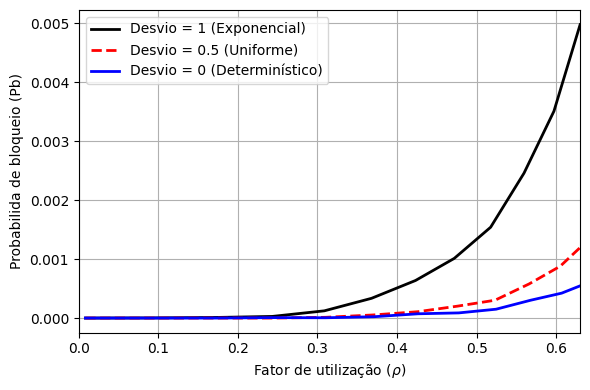

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(rho_exp, Pb_exp, color='black', linewidth=2, linestyle = '-')
plt.plot(rho_uni, Pb_uni, color='red', linewidth=2, linestyle = '--')
plt.plot(rho_det, Pb_det, color='blue', linewidth=2, linestyle = '-')
plt.xlim(0, 0.63)
plt.xlabel(r'Fator de utilização ($\rho$)')
plt.ylabel('Probabilida de bloqueio (Pb)')
plt.legend(['Desvio = 1 (Exponencial)', 'Desvio = 0.5 (Uniforme)', 'Desvio = 0 (Determinístico)'])
plt.grid(True)
plt.tight_layout()
plt.show()